## Assignment 1 (40 marks)
#### =====================================================================================================
### Deadline: 09/08 11:59 pm
#### =====================================================================================================

### Problem 1: SVM Classification (30 marks)

`lab01_dataset_1.xlsx` contains the claim history of 27,513 homeowner policies. The following table describes the eleven columns in the dataset.

| Name | Description |
| --- | --- |
| policy | Policy Identifier |
| exposure | Duration a Policy exposed in a Year |
| num_claims | Number of Claims in a Year |
| amt_claims | Total Claim Amount in a Year	|
| f_primary_age_tier | Age Tier of Primary Insured |
| f_primary_gender | Gender of Primary Insured |
| f_marital | Marital Status of Primary Insured |
| f_residence_location | Location of Residence Property |
| f_fire_alarm_type | Fire Alarm Type |
| f_mile_fire_station | Distance to Nearest Fire Station |
| f_aoi_tier | Amount of Insurance Tier |

We want to predict the *Frequency* which is the *number of claims per unit of exposure* using the above features.  We first divide the reported number of claims by the exposure. This gives us the *Frequency*.  Next, we put the policies into five groups according to their *Frequency* values. We will use this *Group* as our target variable which has five classes.

| Group | Values |
| :--- | :--- |
| 0 | Frequency = 0 |
| 1 | 0 < Frequency <= 1 |
| 2 | 1 < Frequency <= 2 |
| 3 | 2 < Frequency <= 3 |
| 4 | 3 < Frequency |


### 1.a (5 marks)
Create a new column for the dataset which will indiciate the *Frequency Group* and output the updated dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
data = pd.read_excel('lab01_dataset_1-1.xlsx')
data.head()

,policy,exposure,num_claims,amt_claims,f_primary_age_tier,f_primary_gender,f_marital,f_residence_location,f_fire_alarm_type,f_mile_fire_station,f_aoi_tier
0,P00001,1.0,0,0.00,21 - 27,Male,Married,Urban,Alarm Service,< 1 mile,351K - 600K
1,G00002,1.0,0,0.00,38 - 60,Male,Un-Married,Suburban,NaN,1 - 5 miles,< 100K
2,A00003,1.0,2,3079.01,38 - 60,Female,Married,Suburban,Standalone,< 1 mile,100K - 350K
3,P00004,1.0,1,804.87,28 - 37,Female,Un-Married,Suburban,Standalone,1 - 5 miles,< 100K
4,G00005,1.0,1,638.74,28 - 37,Female,Un-Married,Suburban,Alarm Service,< 1 mile,100K - 350K


In [3]:
def categorizeFrequency(frequency):
    if frequency == 0:
        return 0
    elif 0 < frequency <= 1:
        return 1
    elif 1 < frequency <= 2:
        return 2
    elif 2 < frequency <= 3:
        return 3
    else:
        return 4
    
data['Frequency'] = data['num_claims'] / data['exposure'] 
data['Frequency Group'] = data['Frequency'].apply(categorizeFrequency)

In [4]:
data.head()

,policy,exposure,num_claims,amt_claims,f_primary_age_tier,f_primary_gender,f_marital,f_residence_location,f_fire_alarm_type,f_mile_fire_station,f_aoi_tier,Frequency,Frequency Group
0,P00001,1.0,0,0.00,21 - 27,Male,Married,Urban,Alarm Service,< 1 mile,351K - 600K,0.0,0
1,G00002,1.0,0,0.00,38 - 60,Male,Un-Married,Suburban,NaN,1 - 5 miles,< 100K,0.0,0
2,A00003,1.0,2,3079.01,38 - 60,Female,Married,Suburban,Standalone,< 1 mile,100K - 350K,2.0,2
3,P00004,1.0,1,804.87,28 - 37,Female,Un-Married,Suburban,Standalone,1 - 5 miles,< 100K,1.0,1
4,G00005,1.0,1,638.74,28 - 37,Female,Un-Married,Suburban,Alarm Service,< 1 mile,100K - 350K,1.0,1


### 1.b (5 marks)
There are seven categorial features in the dataset namely, *f_aoi_tier, f_primary_age_tier, f_fire_alarm_type, f_marital, f_mile_fire_station, f_primary_gender, f_residence_location*. Display all the unique values of these seven categories.

In [5]:
featureList = ['f_aoi_tier', 'f_primary_age_tier', 'f_fire_alarm_type', 'f_marital', 'f_mile_fire_station', 'f_primary_gender', 'f_residence_location']
for feature in featureList:
    print(feature , ' : ' , list(data[feature].unique()))

f_aoi_tier  :  ['351K - 600K', '< 100K', '100K - 350K', '601K - 1M', '> 1M']
f_primary_age_tier  :  ['21 - 27', '38 - 60', '28 - 37', '> 60', '< 21']
f_fire_alarm_type  :  ['Alarm Service', nan, 'Standalone']
f_marital  :  ['Married', 'Un-Married', 'Not Married']
f_mile_fire_station  :  ['< 1 mile', '1 - 5 miles', '> 10 miles', '6 - 10 miles']
f_primary_gender  :  ['Male', 'Female']
f_residence_location  :  ['Urban', 'Suburban', 'Rural']


### 1.c (5 marks)
We will train SVM models using those seven categorical features. However, their values are currently all categorical data, but SVM requires them to be numerical. Perform ***one-hot encoding*** on these features to obtain an updated dataset which has only numerical values.

In [6]:
oneHotEncoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
oneHotEncoder.set_output(transform = 'pandas')
encodedDf = oneHotEncoder.fit_transform(data[featureList])

print(list(encodedDf.columns))
featureColumns = list(encodedDf.columns)

encodedDf['Frequency Group'] = data['Frequency Group']
encodedDf['policy'] = data['policy']
encodedDf.head()

['f_aoi_tier_100K - 350K', 'f_aoi_tier_351K - 600K', 'f_aoi_tier_601K - 1M', 'f_aoi_tier_< 100K', 'f_aoi_tier_> 1M', 'f_primary_age_tier_21 - 27', 'f_primary_age_tier_28 - 37', 'f_primary_age_tier_38 - 60', 'f_primary_age_tier_< 21', 'f_primary_age_tier_> 60', 'f_fire_alarm_type_Alarm Service', 'f_fire_alarm_type_Standalone', 'f_fire_alarm_type_nan', 'f_marital_Married', 'f_marital_Not Married', 'f_marital_Un-Married', 'f_mile_fire_station_1 - 5 miles', 'f_mile_fire_station_6 - 10 miles', 'f_mile_fire_station_< 1 mile', 'f_mile_fire_station_> 10 miles', 'f_primary_gender_Female', 'f_primary_gender_Male', 'f_residence_location_Rural', 'f_residence_location_Suburban', 'f_residence_location_Urban']


,f_aoi_tier_100K - 350K,f_aoi_tier_351K - 600K,f_aoi_tier_601K - 1M,f_aoi_tier_< 100K,f_aoi_tier_> 1M,f_primary_age_tier_21 - 27,f_primary_age_tier_28 - 37,f_primary_age_tier_38 - 60,f_primary_age_tier_< 21,f_primary_age_tier_> 60,...,f_mile_fire_station_6 - 10 miles,f_mile_fire_station_< 1 mile,f_mile_fire_station_> 10 miles,f_primary_gender_Female,f_primary_gender_Male,f_residence_location_Rural,f_residence_location_Suburban,f_residence_location_Urban,Frequency Group,policy
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,P00001
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,G00002
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2,A00003
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,P00004
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,G00005


### 1.d (5 marks)
Divide the observations into training and testing partitions. Observations whose *Policy Identifier* starts with the letters A, G, and P will go to the training partition. The remaining observations go to the testing partition. Output the total number of policies present in the Training partition and Testing partition.

In [7]:
train = encodedDf['policy'].apply(lambda x: x[0] in ['A', 'G', 'P'])
test  = ~train

trainDF = encodedDf[train]
testDF = encodedDf[test]

print("Training Partition : ", trainDF.shape)
print("Testing Partition  : ", testDF.shape)

Training Partition :  (20661, 27)
Testing Partition  :  (6852, 27)


### 1.e (5 marks)
Train an SVM model using [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). The input features will be the encoded version of the feature set *f_aoi_tier, f_primary_age_tier, f_fire_alarm_type, f_marital, f_mile_fire_station, f_primary_gender, f_residence_location* and the output is the *Frequency Group*. Use `verbose=1` to observe the optimization steps during the training process.

In [8]:
x_train = trainDF[featureColumns]
x_test = trainDF['Frequency Group']

y_train = testDF[featureColumns]
y_test = testDF['Frequency Group']

x_train.head()

svc = SVC(verbose = 1)
svc.fit(x_train, x_test)
y_pred = svc.predict(y_train)

[LibSVM].................
*.......................
*..
*
optimization finished, #iter = 41468
obj = -10496.432530, rho = -0.867185
nSV = 11332, nBSV = 9699
............
*......................
*.
*
optimization finished, #iter = 34259
obj = -4828.883819, rho = -0.965679
nSV = 5804, nBSV = 3972
....
*........
*
optimization finished, #iter = 12158
obj = -1371.791486, rho = -0.994391
nSV = 2411, nBSV = 955
.....
*..........
*.
*
optimization finished, #iter = 16165
obj = -1848.119152, rho = -0.996121
nSV = 2967, nBSV = 1346
..........
*..........
*
optimization finished, #iter = 20669
obj = -4796.310410, rho = -0.899919
nSV = 5410, nBSV = 4251
....
*.........
*.
*
optimization finished, #iter = 13251
obj = -1370.017971, rho = -0.983782
nSV = 2112, nBSV = 960
.....
*...........
*
optimization finished, #iter = 16073
obj = -1842.684366, rho = -0.982946
nSV = 2560, nBSV = 1387
....
*.....*
optimization finished, #iter = 9467
obj = -1360.378481, rho = -0.945071
nSV = 1823, nBSV = 1040
....
*

### 1.f (5 marks)
Compute and output the Accuracy Score on the Testing partition.

In [9]:
accuracyScore = accuracy_score(y_test, y_pred)
print(accuracyScore)

0.5633391710449503


### Problem 2: Perceptron Learning (10 marks)

The dataset `lab01_dataset_2.csv` has a *3-dimensional input space* and a class label of *Positive* and *Negative*. For this task, you are **not allowed** to use any *functionalities* of the `sklearn` module.

### 2.a (5 marks)
Write a function `my_perceptron()` which applies the perceptron algorithm (refer to the lecture slide covering linear separators for details of this algorithm) on the dataset to create a linear separator. `my_perceptron()` takes the dataset as its input and returns a ***3-dimensional weight vector*** which can be used to create the linear separator (assume `bias = 0`). Use the *initial weights* `w = [1,2,3]`. Use a classification threshold of `99%` i.e., `my_perceptron()` will terminate once the misclassification rate is less than `1%`.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('lab01_dataset_2.csv')
data.head()

,X,Y,Z,Class
0,-2.153269,-1.910092,-2.089200,Negative
1,3.354634,-1.803199,-2.849789,Negative
2,-2.773528,4.644997,2.412375,Positive
3,2.890608,-1.188494,-1.723388,Negative
4,-3.416683,4.789795,3.157649,Positive


In [11]:

def my_perceptron():
    thresholdRate = 0.01
    weight = [1, 2, 3]
    X = data.iloc[:, :-1].values
    Y = np.where (data.iloc[:,-1] == "Positive", 1, -1)
    bias = 0
    misClassificationRate = 1.0

    while (misClassificationRate > thresholdRate):
        for i in range(0, len(X)):
            misClassifiedDataPoints = 0
            print("X values : ", X[i], "weight : ", weight, " | Y[i] * (np.dot(X[i], weight) + bias) : ", Y[i] * (np.dot(X[i], weight) + bias))
            if Y[i] * (np.dot(X[i], weight) + bias) <= 0 :
                weight += Y[i] * X[i]
                bias += Y[i]
                misClassifiedDataPoints += 1
                print("Misclassified | ", bias, " | weight : ", weight)
            
        misClassificationRate = misClassifiedDataPoints / len(X)
    print(misClassificationRate)        
    return np.concatenate(([bias], weight))

weightedn = my_perceptron()
print(weightedn)

X values :  [-2.15326928 -1.9100922  -2.08920045] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  12.24105502431535
X values :  [ 3.35463418 -1.80319913 -2.84978878] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  8.801130430248417
X values :  [-2.77352781  4.64499734  2.41237452] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  13.753590440385008
X values :  [ 2.89060771 -1.18849411 -1.72338848] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  4.65654595188065
X values :  [-3.4166827   4.78979468  3.15764895] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  15.635853512484793
X values :  [-2.83013452 -2.02366229  0.50509779] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  5.3621657044223
X values :  [ 3.24532902 -2.43202294 -1.95873669] weight :  [1, 2, 3]  | Y[i] * (np.dot(X[i], weight) + bias) :  7.494926936961676
X values :  [-3.71732962  3.51028064  3.41353218] weight :  [1, 2, 3]  | Y[i] * (np.

### 2.b (5 marks)
Create a *3D plot* which showcases the dataset in a 3D-space alongwith the *linear separator* you obtained from `my_perceptron()`. Use two different colors to represent the data points belonging in the two classes for ease of viewing.

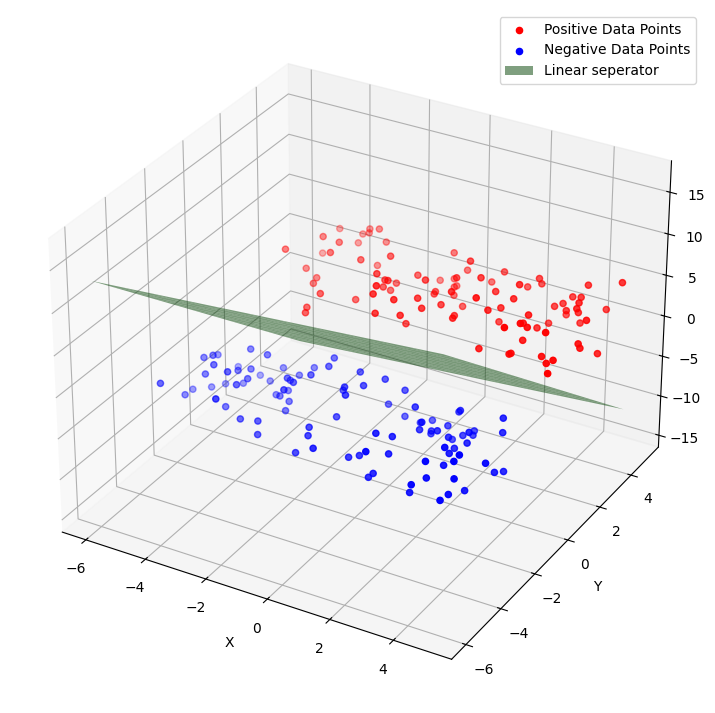

In [12]:
def build3DGraph():
    figure = plt.figure(figsize=(9, 9))
    figure = figure.add_subplot(111, projection='3d')

    figure.scatter(data.loc[data['Class'] == 'Positive', 'X'],
                            data.loc[data['Class'] == 'Positive', 'Y'],
                            data.loc[data['Class'] == 'Positive', 'Z'],
                            color='red',
                            label='Positive Data Points'
                    )
    
    figure.scatter(data.loc[data['Class'] == 'Negative', 'X'], 
                   data.loc[data['Class'] == 'Negative', 'Y'],
                   data.loc[data['Class'] == 'Negative', 'Z'],
                    color='blue',
                            label='Negative Data Points')
    
    x_axis, y_axis = np.meshgrid(range(-6, 6), range(-6, 6))
    z_axis = (-weightedn[0] - weightedn[1] * x_axis -  weightedn[2] * y_axis ) /  weightedn[3]
    figure.plot_surface(x_axis, y_axis, z_axis, color='green', alpha= 0.5, label = 'Linear seperator')

    figure.set_xlabel('X')
    figure.set_ylabel('Y')
    figure.set_zlabel('Z')

    plt.legend()
    plt.show()

build3DGraph() 